In [45]:
# Importing necessary libraries
import pandas as pd
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
from collections import Counter
import warnings # Importing warnings module to handle warnings

# Ignoring FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning

In [46]:
# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

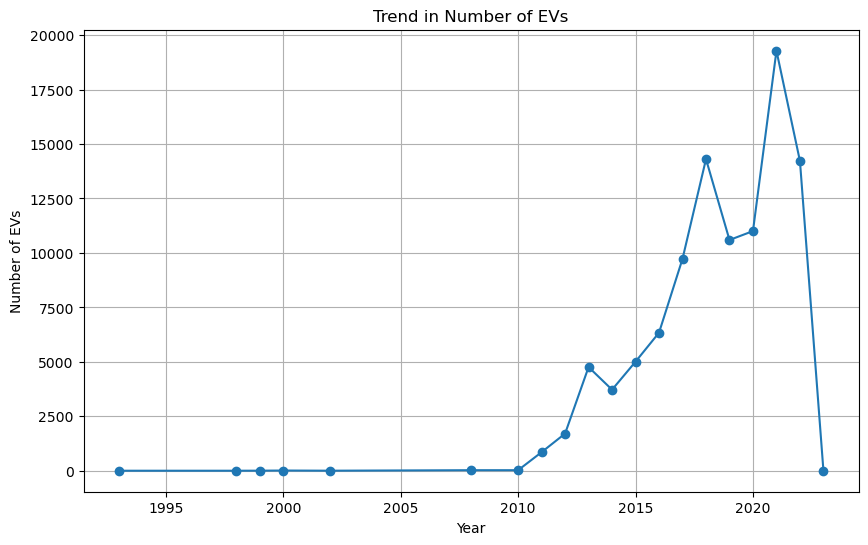

In [47]:
# Plotting the trend in number of EVs over years
ev_trend = df['Model Year'].value_counts().sort_index()
# print("\nEV trend data:\n")
# print(ev_trend)
plt.figure(figsize=(10, 6))
ev_trend.plot(kind='line', marker='o')
plt.title('Trend in Number of EVs')
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WA'),
  Text(1, 0, 'CA'),
  Text(2, 0, 'VA'),
  Text(3, 0, 'MD'),
  Text(4, 0, 'TX')])

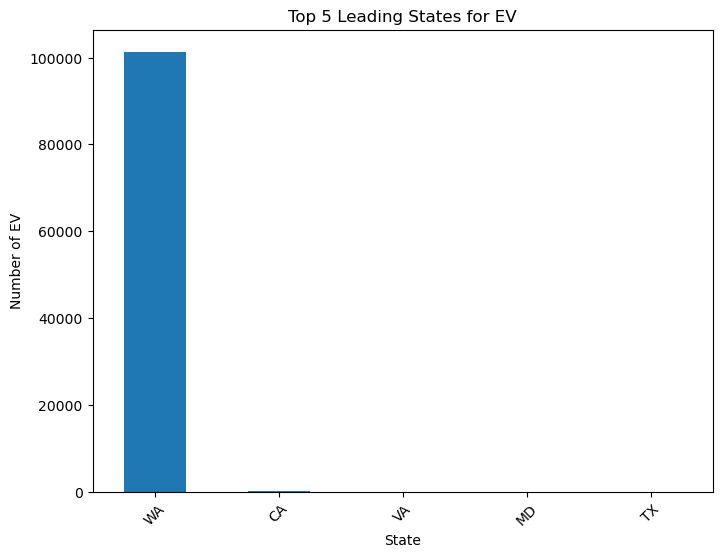

In [48]:
# Extracting and plotting the top 5 states with the most EVs
top_states = df['State'].value_counts().head(5)
# print("\nTop 5 states data:\n")
# print(top_states)
# Plotting the top 5 states
plt.figure(figsize=(8, 6))
top_states.plot(kind='bar')
plt.title('Top 5 Leading States for EV')
plt.xlabel('State')
plt.ylabel('Number of EV')
plt.xticks(rotation=45) # Rotating the x-axis labels for better readability

In [49]:
# Exclude data from Washington state
data_excluding_wa = df[df['State'] != 'WA'] # Filtering the DataFrame to exclude data from Washington state
top_states_excluding_wa = data_excluding_wa['State'].value_counts().head(10)  # Counting the number of EVs per state excluding Washington and selecting the top 10 states


# print("\nTop states excluding WA:\n")
# print(top_states_excluding_wa)

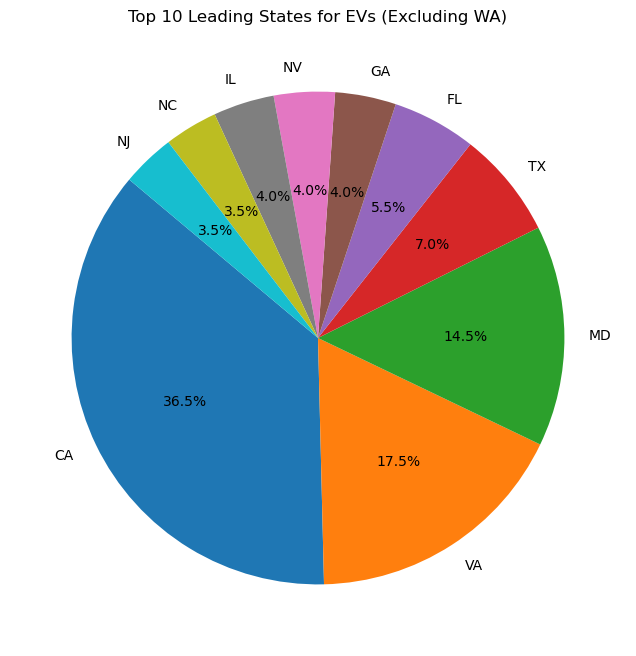

In [50]:
# Plotting the top 10 states excluding WA using a pie chart
plt.figure(figsize=(8, 8))
top_states_excluding_wa.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Leading States for EVs (Excluding WA)')
plt.ylabel('')
plt.show()

In [51]:
# Counting the number of EVs per state excluding Washington and selecting the top 10 states
perception_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# print("\nCAFV eligibility:\n")
# print(perception_counts)

<Figure size 800x800 with 0 Axes>

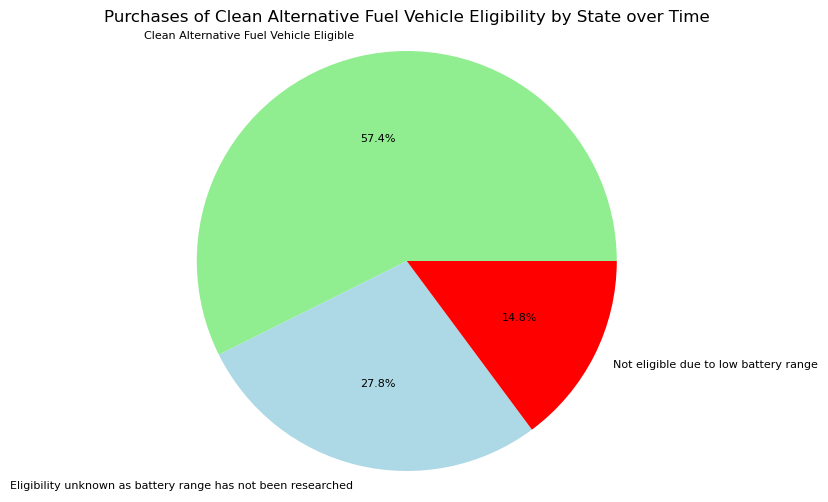

In [52]:
plt.figure(figsize=(8, 8))

# Creating a legend manually
legend_labels = ['A', 'B', 'C']

plt.figure(figsize=(10, 6))  # Increase figure size to accommodate the text
plt.pie(perception_counts, labels=perception_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'red'], textprops={'fontsize': 8})
plt.title('Purchases of Clean Alternative Fuel Vehicle Eligibility by State over Time')
plt.axis('equal')  # Ensuring the pie chart is circular
plt.show()

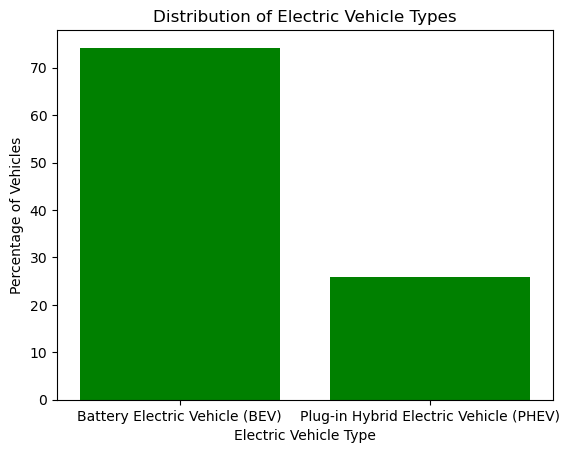

In [53]:
# Analyze and visualize distribution of Electric Vehicle Types
ev_types = df['Electric Vehicle Type'].value_counts()
ev_types_percentage = ev_types / ev_types.sum() * 100  # Calculating the percentage of each Electric Vehicle Type
plt.bar(ev_types_percentage.index, ev_types_percentage.values, color='green')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Percentage of Vehicles')
plt.xticks(rotation=0)
plt.show()

In [54]:
# Create bins for Electric Range
bins = [0, 10, 100, 200, float('inf')]  # Defining bins for categorizing Electric Range
labels = ['< 10', '11 - 100', '101 - 200', 'Above 200']

# Add a new column 'Range Category' based on Electric Range bins
df['Range Category'] = pd.cut(data_excluding_wa['Electric Range'], bins=bins, labels=labels)

# Group by 'Model Year', 'Range Category', to count the number of EVs
range_by_category = df.groupby(['Model Year', 'Range Category'])['VIN (1-10)'].count().unstack()

# print("\nRange category over time:\n")
# print(range_by_category)

<Figure size 1200x800 with 0 Axes>

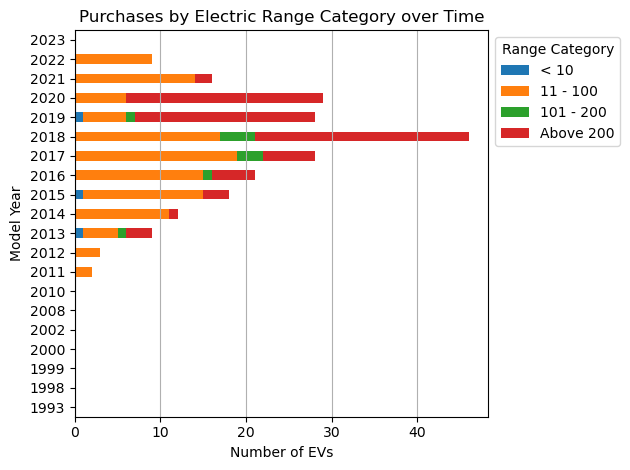

In [55]:
# Plotting the purchases by Electric Range Category over time as a horizontal bar chart
plt.figure(figsize=(12, 8))
range_by_category.plot(kind='barh', stacked=True)
plt.title('Purchases by Electric Range Category over Time')
plt.xlabel('Number of EVs')
plt.ylabel('Model Year')
plt.legend(title='Range Category', bbox_to_anchor=(1, 1), loc='upper left') # Adding a legend with a title and positioning it outside the plot
plt.grid(axis='x')  # Adding grid lines along the x-axis
plt.tight_layout()
plt.show()

In [56]:
# Filter out data with Base MSRP as 0
filtered_df = df[df['Base MSRP'] > 0]  # Filtering the DataFrame to exclude data with Base MSRP equal to 0

# print("\nMSRP data:\n")
# print(filtered_df)

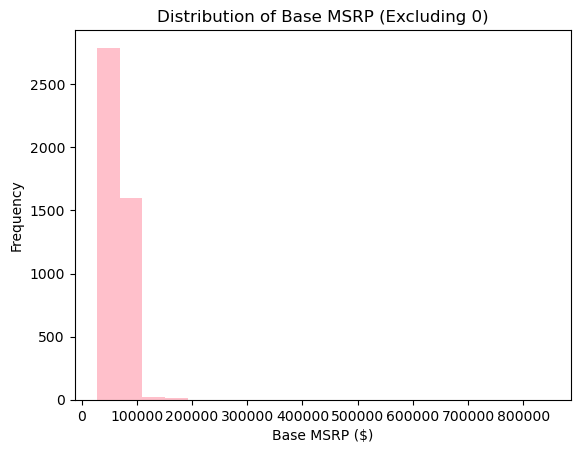

In [57]:
# Plotting the distribution
plt.hist(filtered_df['Base MSRP'], bins=20, color='pink')
plt.title('Distribution of Base MSRP (Excluding 0)')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.show()


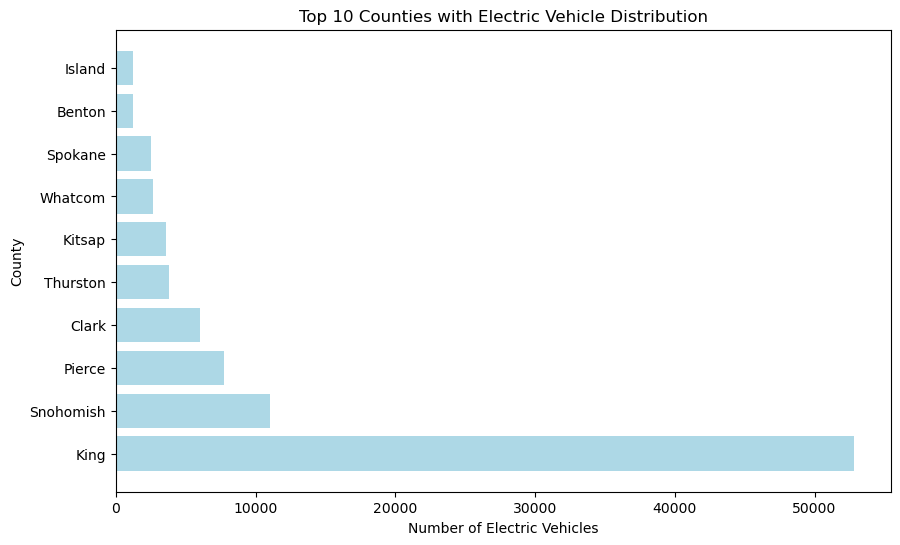

In [58]:
plt.figure(figsize=(10, 6))
# Counting the top 10 counties with the most electric vehicles
county_counts = df['County'].value_counts().nlargest(10)

# print("\nTop counties:\n")
# print(county_counts)

plt.barh(county_counts.index, county_counts.values, color='lightblue')
plt.title('Top 10 Counties with Electric Vehicle Distribution')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

In [59]:
# Grouping by 'Make' and 'Model' and count the number of EVs
make_model_purchases = data_excluding_wa.groupby(['Make', 'Model'])['VIN (1-10)'].count().sort_values(ascending=False).head(10)

# print("\nMake model count:\n")
# print(make_model_purchases)

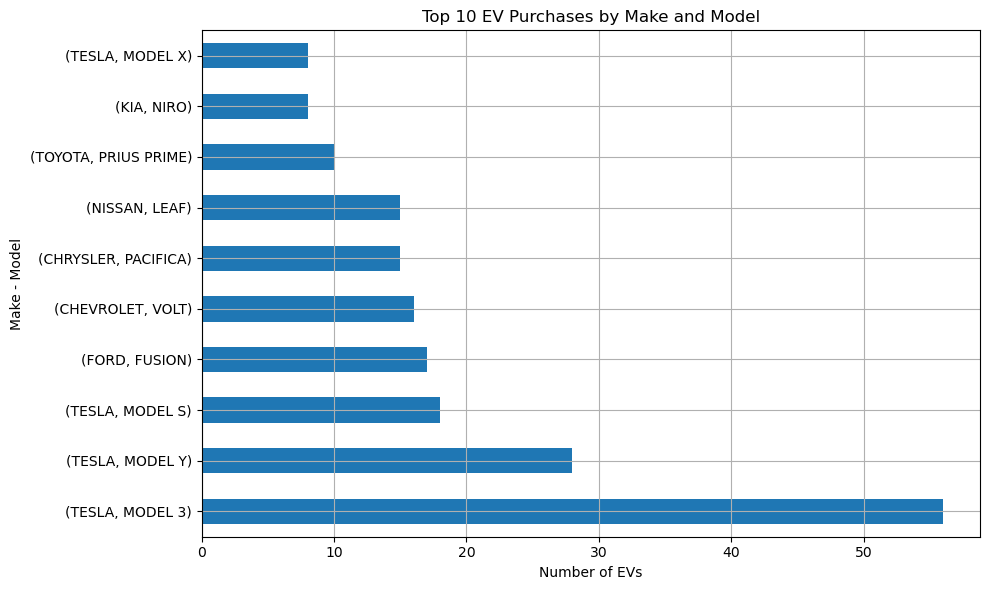

In [60]:
# Plotting the top 10 EV purchases by 'Make' and 'Model'
plt.figure(figsize=(10, 6))
make_model_purchases.plot(kind='barh')
plt.title('Top 10 EV Purchases by Make and Model')
plt.xlabel('Number of EVs')
plt.ylabel('Make - Model')
plt.grid(True)
plt.tight_layout()
plt.show()

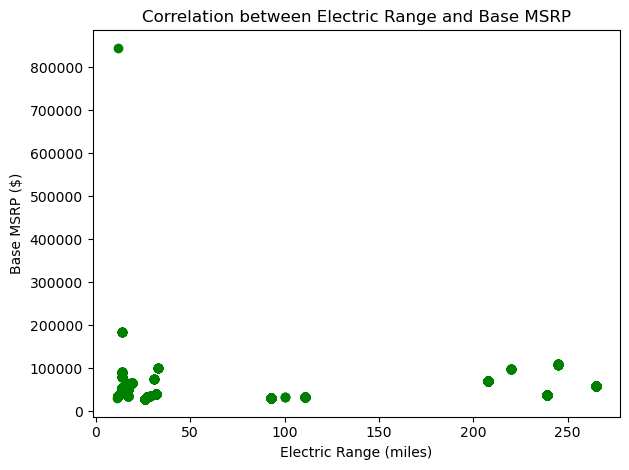

In [61]:
# Analyze and visualize correlation between Electric Range and Base MSRP
plt.scatter(df[df['Base MSRP'] > 0]['Electric Range'], df[df['Base MSRP'] > 0]['Base MSRP'], color='green')  # Creating a scatter plot for Electric Range vs. Base MSRP
# print(df[df['Base MSRP'] > 0]['Electric Range'], df[df['Base MSRP'] > 0]['Base MSRP'])
plt.title('Correlation between Electric Range and Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.tight_layout()
plt.show()

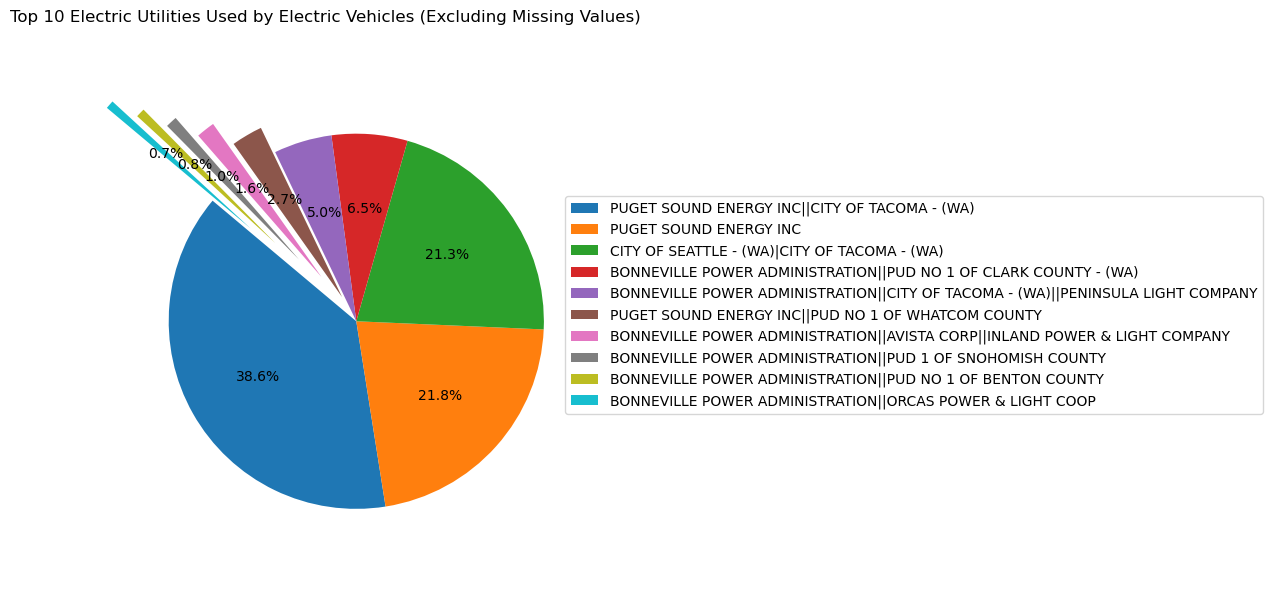

In [62]:
# Filter out rows with missing values in 'Electric Utility'
filtered_df = df.dropna(subset=['Electric Utility']) # Removing rows with missing values in 'Electric Utility'

#  visualize the distribution of Electric Utility
plt.figure(figsize=(12, 6))

# Calculate utility counts and percentages
utility_counts = filtered_df['Electric Utility'].value_counts().nlargest(10)  # Counting the top 10 Electric Utility companies
utility_counts_percentage = utility_counts / utility_counts.sum() * 100  # Calculating the percentage distribution of Electric Utility companies

# print("\nTop 10 Electric Utility Company: \n")
# print(utility_counts)
# print(utility_counts_percentage)

explode = (0, 0, 0, 0, 0,0.15,0.3,0.45,0.6,0.75)  # Explode segments to be visible


colors = plt.cm.tab10.colors  # Using tab10 colormap for colors
plt.pie(utility_counts_percentage, labels=None, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)

# Adjust subplot position to shift the pie chart to the left
plt.subplots_adjust(left=0.1, right=0.5)

# Create legend based on colors
legend_labels = utility_counts.index
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Top 10 Electric Utilities Used by Electric Vehicles (Excluding Missing Values)')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [63]:
#This code has been extracted from my EX08 assignment and changes have been made to read a .txt file instead of a URL.

# Defining a function to fetch text from a .txt file.
def fetch_text(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    return text

# Defining a function to preprocess the text by removing non-alphabetic characters from the text and converting the text to lowercase.
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Defining a function to filter the text by removing the stopwords.
def filter_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# Defining a function to generate bigrams from the filtered text.
def generate_bigrams(text):
    words = text.split()
    bigrams = [f"{words[i]}_{words[i + 1]}" for i in range(len(words) - 1)]
    bigram_counts = Counter(bigrams)
    frequent_bigrams = [bigram for bigram, count in bigram_counts.items() if count > 4]
    return frequent_bigrams

# Defining a function to generate wordcloud.
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Defining a function to analyze the sentiment of the text.
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Defining a function to read the stopwords.
def read_stopwords(stopwords_file):
    with open(stopwords_file, 'r') as f:
        stopwords = set(f.read().split())
    return stopwords

# Modify the process_files function to accept file paths instead of URLs.
def process_files(file_paths, stopwords_file):
    stopwords = read_stopwords(stopwords_file)
    for file_path in file_paths:
        content = fetch_text(file_path)
        if content:
            # print("Text from file:", file_path)
            # print()
            # paragraphs = content.split('\n\n')
            # for paragraph in paragraphs:
            #     if paragraph.strip():
            #         print(paragraph)

            preprocessed_text = preprocess(content)
            processed_text = filter_stopwords(preprocessed_text, stopwords)
            words = processed_text.split()
            bigrams = generate_bigrams(processed_text)

            print("\nBigrams:")
            print()
            for bigram in bigrams:
                print(bigram)

            wordcloud = create_wordcloud(' '.join(words + bigrams))
            print("\nWord Cloud for file:", file_path)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.show()

            sentiment = analyze_sentiment(processed_text)
            print("\nSentiment for file:", file_path)
            print()
            print("Positive:", sentiment['pos'])
            print("Negative:", sentiment['neg'])
            print("Neutral:", sentiment['neu'])
            print("Compound:", sentiment['compound'])
            print()

In [64]:
# Load the file paths to be processed.
file_paths = ["EV.txt"]

In [65]:
# Loading the stopwords_en.txt file by calling the function.
stopwords_file = 'stopwords_en.txt'


Bigrams:

average_ev
direct_subsidies
ev_owners
gallon_gasoline
gallon_equivalent
ev_owner
federal_government
federal_state
electric_grid
fuel_economy
cafe_standards
ghg_emissions
ev_buyers
infrastructure_costs
ev_charging
fast_charging
charging_stations

Word Cloud for file: EV.txt


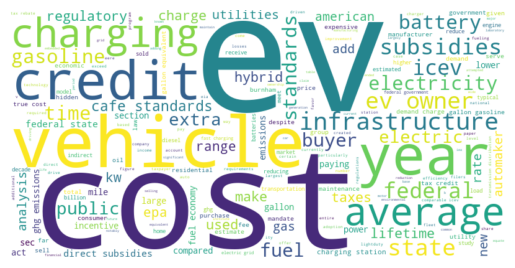


Sentiment for file: EV.txt

Positive: 0.122
Negative: 0.049
Neutral: 0.829
Compound: 0.9996



In [66]:
# Call the function process_files to start processing.
process_files(file_paths, stopwords_file)